<a href="https://colab.research.google.com/github/AlexanderDerango/MLSN_Project_Fall_2025/blob/main/MLSN_MAIN_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Directions!

---
Make sure only 1 person is running the Colab at a time!

In [ ]:
!pip install kaggle
!pip install seaborn

Importing Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files

# Directions to get Kaggle API Key!!!:

# 1) Go to kaggle.com and make an account (if you haven't already)
# 2) Go to settings (click profile on top right corner)
# 3) Scroll down to API
# 4) Create new token and name file kaggle.json (should be default name)
# 5) Upload

files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d utkarshx27/american-companies-bankruptcy-prediction-dataset

!unzip american-companies-bankruptcy-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/utkarshx27/american-companies-bankruptcy-prediction-dataset
License(s): CC0-1.0
  0% 0.00/4.47M [00:00<?, ?B/s]
100% 4.47M/4.47M [00:00<00:00, 754MB/s]
Archive:  american-companies-bankruptcy-prediction-dataset.zip
  inflating: american_bankruptcy.csv  


Dataset:

In [ ]:
dataset = pd.read_csv("american_bankruptcy.csv")
dataset.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

Splitting Dataset into Training (80%), Validation (10%), Testing (10%)

In [ ]:
train_val, test = train_test_split(dataset, test_size=0.1, random_state=42)

# Step 2: Split the remaining 90% into train (80%) and validation (10%)
# 10% of 90% = 0.1111 (≈ 10% of total)
train, val = train_test_split(train_val, test_size=0.1111, random_state=42)

# Step 3: Save each split to a separate CSV file
train.to_csv("train.csv", index=False)
val.to_csv("validation.csv", index=False)
test.to_csv("test.csv", index=False)

# Optional: print confirmation
print(f"Train: {len(train)} rows")
print(f"Validation: {len(val)} rows")
print(f"Test: {len(test)} rows")

Train: 62945 rows
Validation: 7868 rows
Test: 7869 rows


Logistic Regression and Gradient booster trees

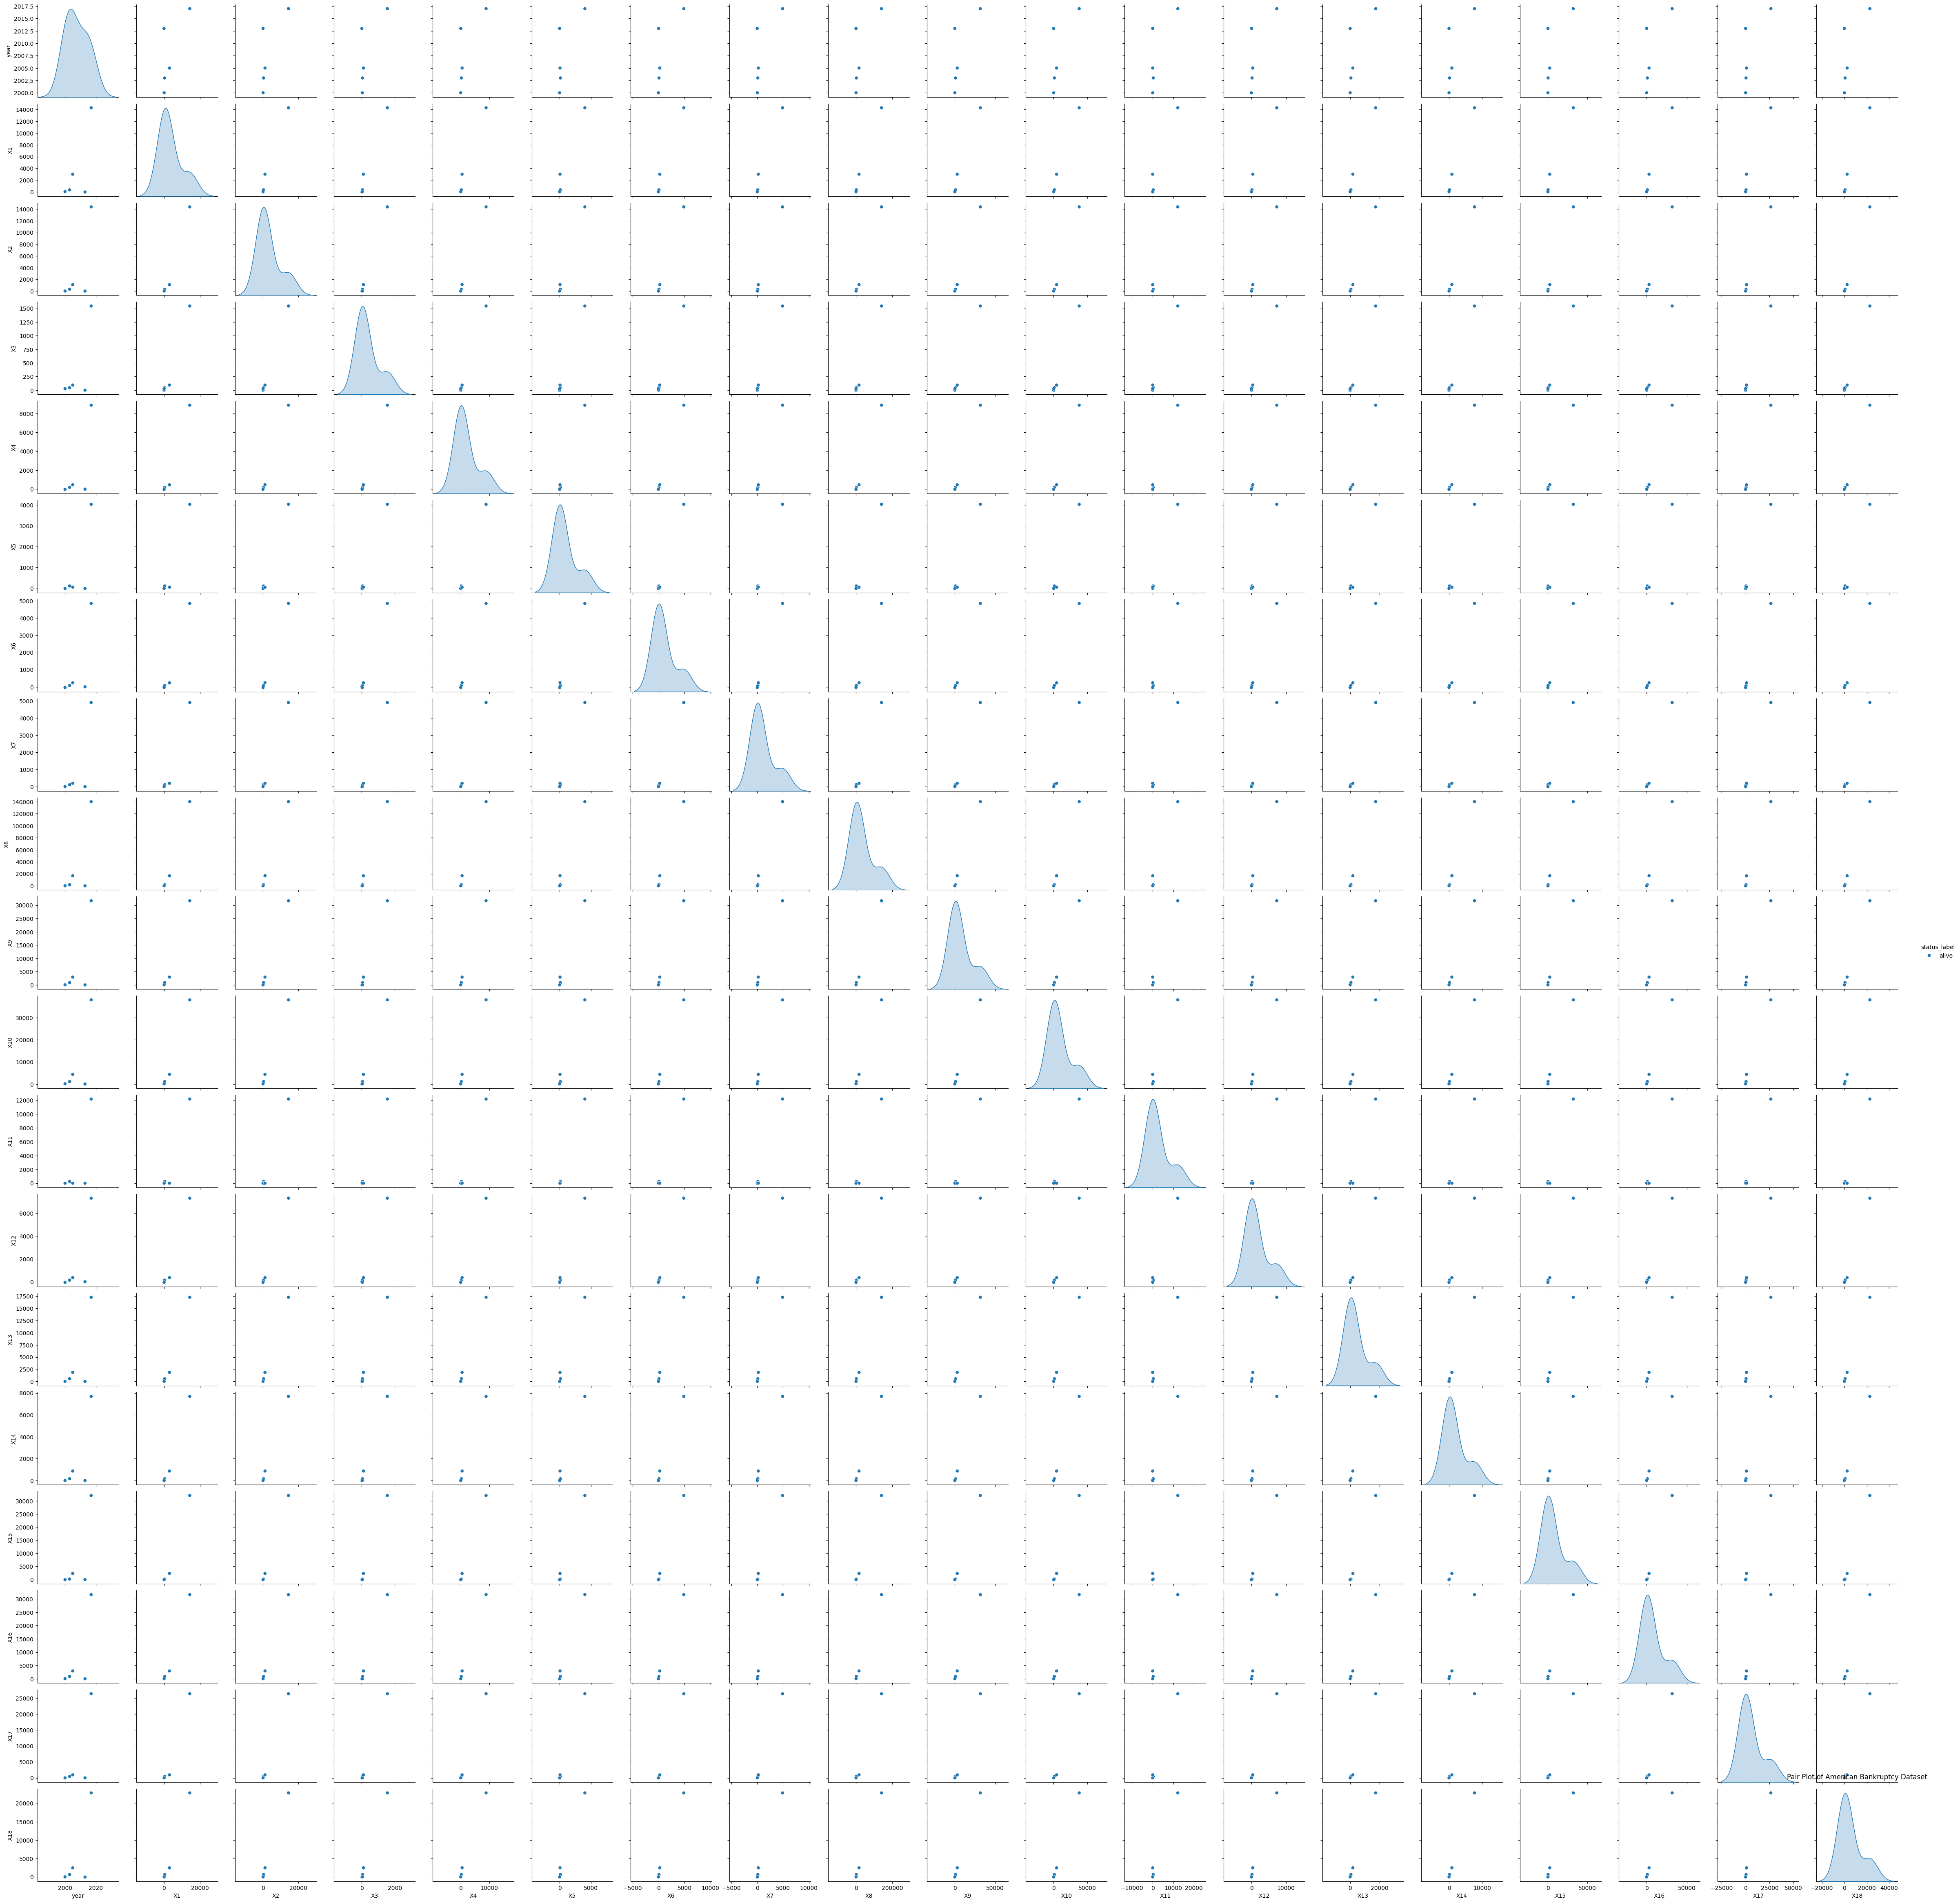

In [ ]:
sns.pairplot(train.head(), hue='status_label')
plt.title('Pair Plot of American Bankruptcy Dataset')
plt.show()